# Projeto: Twitter para Epidemiologia - Febre amarela (Pibic 2017-2018)

## serching tweets

In [1]:
import twitter

def oauth_login():
    # XXX: Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'Riew8e4LKVoEJ51HbeOm6wsYA'
    CONSUMER_SECRET = '3pPE1z3kTJGQiY93yCqgLUTURJO2wOcoQCcMbyMbCj4Gm9Hc6N'
    OAUTH_TOKEN = '2904474861-kdalTd2NVus3q0PdvAiD3gB2IlF9IFZzao01ol7'
    OAUTH_TOKEN_SECRET = '2yHMlMAEUZflpw5swYaLA8EjFyPyPJWnJT84VJoAHDKCU'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    
    
    return twitter_api

# Sample usage
twitter_api = oauth_login()    

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

In [2]:
def twitter_search(twitter_api, q, max_results=2000, **kw):  #max_results=200

    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets and 
    # https://dev.twitter.com/docs/using-search for details on advanced 
    # search criteria that may be useful for keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    search_results = twitter_api.search.tweets(q=q, count=2000, **kw)   # count=100
    
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://dev.twitter.com/docs/rate-limiting/1.1/limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(2000, max_results)
    
    for _ in range(20): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError: # No more results when next_results doesn't exist
            break
            
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

In [16]:
import json
import pymongo # pip install pymongo

def save_to_mongo(data, mongo_db, mongo_db_coll, **mongo_conn_kw):
    
    # Connects to the MongoDB server running on 
    # localhost:27017 by default
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    
    # Get a reference to a particular database
    
    db = client[mongo_db]
    
    # Reference a particular collection in the database
    
    coll = db[mongo_db_coll]
    i = 0
    for tweet in results:
        if tweet["created_at"] and tweet["lang"] == "pt" and tweet["retweeted"] == False :
            if tweet["geo"] != None or tweet["place"] != None or tweet["coordinates"] != None:
                if tweet["place"]["country_code"] == "BR":
                    i += 1
                    #if(i < 9):
                    print(i,"\ncreated_at : ",tweet["created_at"],"\nid_str",tweet["id_str"],"\ntext - ",
                          tweet["text"],"retweeted - ",tweet["retweeted"],"coordinates - ",tweet["coordinates"],
                          "\nlang - ",tweet["lang"],"\nGEO - ",tweet["geo"],"\nPlace - ",tweet["place"],"\n")

                    obj = {"created_at":tweet["created_at"],"id":tweet["id"],"id_str":tweet["id_str"],"text":tweet["text"],
                           "geo":str(tweet["geo"]),"lang":str(tweet["lang"]),"coordinates":str(tweet["coordinates"]),
                           "retweet_count":tweet["retweet_count"],"retweeted":tweet["retweeted"],"place":tweet["place"]}
                    cursor = coll.insert_one(obj).inserted_id

    # Perform a bulk insert and  return the IDs
    
    return cursor

def load_from_mongo(mongo_db, mongo_db_coll, return_cursor=False,
                    criteria=None, projection=None, **mongo_conn_kw):
    
    # Optionally, use criteria and projection to limit the data that is 
    # returned as documented in 
    # http://docs.mongodb.org/manual/reference/method/db.collection.find/
    
    # Consider leveraging MongoDB's aggregations framework for more 
    # sophisticated queries.
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    db = client[mongo_db]
    coll = db[mongo_db_coll]
    
    if criteria is None:
        criteria = {}
    
    if projection is None:  
        cursor = coll.find(criteria)
    else:
        cursor = coll.find(criteria, projection)

    # Returning a cursor is recommended for large amounts of data
    
    if return_cursor:
        return cursor
    else:
        return [ item for item in cursor ]

In [17]:

q = 'sarampo'

twitter_api = oauth_login()
results = []
i = 0
for i in range(1):
    i += 1
    result = twitter_search(twitter_api, q, max_results=1000)
    print (i,' - capturando ', len(result),' tweets...')
    #results.append(result)
    results += result
#print(type(result))
#print(type(results))
print("Numero de tweets capturados: ", len(results))

#results = twitter_search(twitter_api, q, max_results=1000)
#save_to_mongo(results, 'tweets', q)
#results[2]

1  - capturando  196  tweets...
Numero de tweets capturados:  196


In [9]:
result[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jul 29 04:50:05 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 467875902,
    'id_str': '467875902',
    'indices': [3, 13],
    'name': 'Salvador Lula Daqui',
    'screen_name': 'FlaRobSal'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1023430436024922112,
 'id_str': '1023430436024922112',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'pt',
 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 69,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sat Jul 28 16:09:28 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'ex

In [ ]:
# Inicio da coleta de dados 24 de julho de 2018 
save_to_mongo(results, 'febre_amarela_1', q)

In [5]:
import twitter

def oauth_login():
    # XXX: Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'Riew8e4LKVoEJ51HbeOm6wsYA'
    CONSUMER_SECRET = '3pPE1z3kTJGQiY93yCqgLUTURJO2wOcoQCcMbyMbCj4Gm9Hc6N'
    OAUTH_TOKEN = '2904474861-kdalTd2NVus3q0PdvAiD3gB2IlF9IFZzao01ol7'
    OAUTH_TOKEN_SECRET = '2yHMlMAEUZflpw5swYaLA8EjFyPyPJWnJT84VJoAHDKCU'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

# Sample usage
twitter_api = oauth_login()    

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

In [6]:
def twitter_search(twitter_api, q, max_results=2000, **kw):  #max_results=200

    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets and 
    # https://dev.twitter.com/docs/using-search for details on advanced 
    # search criteria that may be useful for keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    search_results = twitter_api.search.tweets(q=q, count=2000, **kw)   # count=100
    
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://dev.twitter.com/docs/rate-limiting/1.1/limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(2000, max_results)
    
    for _ in range(20): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError: # No more results when next_results doesn't exist
            break
            
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

In [7]:
import json
import pymongo # pip install pymongo


def save_to_mongo(data, mongo_db, mongo_db_coll, **mongo_conn_kw):
    
    # Connects to the MongoDB server running on 
    # localhost:27017 by default
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    
    # Get a reference to a particular database
    
    db = client[mongo_db]
    
    # Reference a particular collection in the database
    
    coll = db[mongo_db_coll]
    
    i = 0
    for tweet in results:
        if tweet["created_at"] and tweet["lang"] == "pt" and tweet["retweeted"] == False:
            if tweet["geo"] != None or tweet["place"] != None or tweet["coordinates"] != None:
                if tweet["place"]["country_code"] == "BR":
                    i += 1
                    if(i < 3):
                        print(i,"\ncreated_at : ",tweet["created_at"],"\nid_str",tweet["id_str"],"\ntext - ",
                              tweet["text"],"retweeted - ",tweet["retweeted"],"coordinates - ",tweet["coordinates"],
                              "\nlang - ",tweet["lang"],"\nGEO - ",tweet["geo"],"\nPlace - ",tweet["place"],"\n")

                        obj = {"created_at":tweet["created_at"],"id":tweet["id"],"id_str":tweet["id_str"],"text":tweet["text"],
                               "geo":tweet["geo"],"lang":tweet["lang"],"coordinates":tweet["coordinates"],
                               "retweet_count":tweet["retweet_count"],"retweeted":tweet["retweeted"],"place":tweet["place"]}
                        cursor = coll.insert_one(obj).inserted_id

    # Perform a bulk insert and  return the IDs
    
    return cursor

def load_from_mongo(mongo_db, mongo_db_coll, return_cursor=False,
                    criteria=None, projection=None, **mongo_conn_kw):
    
    # Optionally, use criteria and projection to limit the data that is 
    # returned as documented in 
    # http://docs.mongodb.org/manual/reference/method/db.collection.find/
    
    # Consider leveraging MongoDB's aggregations framework for more 
    # sophisticated queries.
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    db = client[mongo_db]
    coll = db[mongo_db_coll]
    
    if criteria is None:
        criteria = {}
    
    if projection is None:  
        cursor = coll.find(criteria)
    else:
        cursor = coll.find(criteria, projection)

    # Returning a cursor is recommended for large amounts of data
    
    if return_cursor:
        return cursor
    else:
        return [ item for item in cursor ]

## Salvando no MongoDB

### capturando tweets e salvando no mongodb

In [8]:

q = 'sarampo'

twitter_api = oauth_login()
results = []
i = 0
for i in range(1):
    i += 1
    result = twitter_search(twitter_api, q, max_results=1000)
    print (i,' - capturando ', len(result),' tweets...')
    #results.append(result)
    
    results += result
#print(type(result))
#print(type(results))
print("Numero de tweets capturados: ", len(results))

#results = twitter_search(twitter_api, q, max_results=1000)
#save_to_mongo(results, 'tweets', q)
#results[2]

1  - capturando  197  tweets...
Numero de tweets capturados:  197


In [ ]:
save_to_mongo(results, 'febre_amarela', q)
#save_to_mongo(results, 'twitter_febre_amarela', q)

In [10]:
i = 0
for tweet in results:
    if tweet["created_at"] and tweet["lang"] == "pt" and tweet["retweeted"] != None:
        if tweet["geo"] != None or tweet["place"] != None or tweet["coordinates"] != None:
            if tweet["place"]["country_code"] == "BR":
                i += 1
                #if(i < 3):
                print(i,"  -  id_str",tweet["id_str"],"\nTexto - ",tweet["text"] ,"\n")

In [11]:
i = 0
for tweet in results:
    if tweet["created_at"] and tweet["lang"] == "pt" and tweet["retweeted"] == False :
        if tweet["geo"] != None or tweet["place"] != None or tweet["coordinates"] != None or tweet["coordinates"]:
            if tweet["place"]["country_code"] == "BR":
                i += 1
                print(i,"\ncreated_at : ",tweet["created_at"],"\nid_str",tweet["id_str"],
                      "\ntext - ",tweet["text"],"retweeted - ",tweet["retweeted"],"\ncoordinates - ",tweet["coordinates"],
                      "\nlang - ",tweet["lang"],"\nGEO - ",tweet["geo"],"\nPlace - ",tweet["place"],"\n")

                obj = {"created_at":tweet["created_at"],"id":tweet["id"],"id_str":tweet["id_str"],"text":tweet["text"],
                       "geo":tweet["geo"],"lang":tweet["lang"],"coordinates":tweet["coordinates"],
                       "retweeted":tweet["place"],"place":tweet["place"]}


In [25]:
# Salvando twitter distintos de um banco de dados em outro

import json
import pymongo # pip install pymongo


c = pymongo.MongoClient()
banco = c["twitter_febre_amarela"]
coll = banco["febre amarela"]
dis = coll.distinct("id_str")


mg = load_from_mongo("twitter_febre_amarela","febre amarela")
#cliente = pymongo.MongoClient()
db = c.twitter_febre_amarela_1

#print(dis)

dis_tamanho = len(dis)
i = 0
e = 0
for tweet in mg:
    #if dis_tamanho >= 0: 
    if dis[i] == tweet["id_str"]:
        print(i,"\n - Dis - ",dis[i],"\nid_str - ",tweet["id_str"],"\n")

        print(i,"\ncreated_at : ",tweet["created_at"],"\nid",int(tweet["id_str"]),"\nid_str",tweet["id_str"],"\ntext - ",
              tweet["text"],"retweeted - ",tweet["retweeted"],"coordinates - ",tweet["coordinates"],
              "\nlang - ",tweet["lang"],"\nGEO - ",tweet["geo"],"\nPlace - ",tweet["place"],"\n")
        
#         obj = {"created_at":tweet["created_at"],"id":int(tweet["id_str"]),"id_str":tweet["id_str"],"text":tweet["text"],"geo":tweet["geo"],
#                "lang":tweet["lang"],"coordinates":tweet["coordinates"],"retweeted":"false",
#                "place":tweet["place"]}
        
        
        obj = {"created_at":tweet["created_at"],"id":tweet["id"],"id_str":tweet["id_str"],"text":tweet["text"],
               "geo":tweet["geo"],"lang":tweet["lang"],"coordinates":tweet["coordinates"],
               "retweeted":tweet["retweeted"],"place":tweet["place"],
               "data":tweet["data"], "cidade":tweet["cidade"], "estado":tweet["estado"]}

        cursor = db.febre_amarela.insert_one(obj).inserted_id
        i += 1
        dis_tamanho -= 1
            #cursor = coll.insert_one(obj).inserted_id
    #else:
     #   e += 1
        #print(e," - ",tweet["id_str"],"\n")


# Perform a bulk insert and  return the IDs



0 
 - Dis -  973656844601315328 
id_str -  973656844601315328 

0 
created_at :  Tue Mar 13 20:27:36 +0000 2018 
id 973656844601315328 
id_str 973656844601315328 
text -  Hoje que tomei coragem de dar vacina da febre amarela a Mikaelly. retweeted -  false coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': 'b1a5f3bbff698d24', 'url': 'https://api.twitter.com/1.1/geo/id/b1a5f3bbff698d24.json', 'place_type': 'city', 'name': 'Mesquita', 'full_name': 'Mesquita, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-43.496757, -22.840589], [-43.397015, -22.840589], [-43.397015, -22.764566], [-43.496757, -22.764566]]]}, 'attributes': {}} 

1 
 - Dis -  973649386491260929 
id_str -  973649386491260929 

1 
created_at :  Tue Mar 13 19:57:57 +0000 2018 
id 973649386491260929 
id_str 973649386491260929 
text -  Faleceu um parente de uma amiga vítima de febre amarela, a situação tá punk. Quem ainda não se vacinou

GEO -  None 
Place -  {'id': '0933c11f6b472a2b', 'url': 'https://api.twitter.com/1.1/geo/id/0933c11f6b472a2b.json', 'place_type': 'city', 'name': 'Campinas', 'full_name': 'Campinas, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-47.2450492, -23.06071], [-46.815387, -23.06071], [-46.815387, -22.729279], [-47.2450492, -22.729279]]]}, 'attributes': {}} 

53 
 - Dis -  976103928734547968 
id_str -  976103928734547968 

53 
created_at :  Tue Mar 20 14:31:26 +0000 2018 
id 976103928734547968 
id_str 976103928734547968 
text -  N fiz a vacina da febre amarela 
Vo morre será? retweeted -  false coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '51bf596b82275cad', 'url': 'https://api.twitter.com/1.1/geo/id/51bf596b82275cad.json', 'place_type': 'city', 'name': 'Pelotas', 'full_name': 'Pelotas, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon

GEO -  None 
Place -  {'id': '68e019afec7d0ba5', 'url': 'https://api.twitter.com/1.1/geo/id/68e019afec7d0ba5.json', 'place_type': 'city', 'name': 'Sao Paulo', 'full_name': 'Sao Paulo, Brazil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-46.826039, -24.008814], [-46.365052, -24.008814], [-46.365052, -23.356792], [-46.826039, -23.356792]]]}, 'attributes': {}} 

148 
 - Dis -  979487312844394496 
id_str -  979487312844394496 

148 
created_at :  Thu Mar 29 22:35:48 +0000 2018 
id 979487312844394496 
id_str 979487312844394496 
text -  CONFIRMADA  A  MORTE D EUM MACACO POR FEBRE AMARELA EM UBATUBA SP...https://t.co/gVf4OHdhxZ https://t.co/pFWKc7iyQ8 retweeted -  false coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '143d581cbe8b95af', 'url': 'https://api.twitter.com/1.1/geo/id/143d581cbe8b95af.json', 'place_type': 'city', 'name': 'Ubatuba', 'full_name': 'Ubatuba, Brasil', 'country_code': 'BR', 'count

GEO -  None 
Place -  {'id': '59373f0a295160e4', 'url': 'https://api.twitter.com/1.1/geo/id/59373f0a295160e4.json', 'place_type': 'city', 'name': 'Niterói', 'full_name': 'Niterói, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-43.1648112, -22.98297], [-42.954408, -22.98297], [-42.954408, -22.8261279], [-43.1648112, -22.8261279]]]}, 'attributes': {}} 

225 
 - Dis -  982271742780387328 
id_str -  982271742780387328 

225 
created_at :  Fri Apr 06 15:00:07 +0000 2018 
id 982271742780387328 
id_str 982271742780387328 
text -  Aí pega dengue, Zika, febre amarela e chikungunha nesse mato https://t.co/DByIDPLgCO retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '59373f0a295160e4', 'url': 'https://api.twitter.com/1.1/geo/id/59373f0a295160e4.json', 'place_type': 'city', 'name': 'Niterói', 'full_name': 'Niterói, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within'

lang -  pt 
GEO -  None 
Place -  {'id': 'd9d978b087a92583', 'url': 'https://api.twitter.com/1.1/geo/id/d9d978b087a92583.json', 'place_type': 'city', 'name': 'Belo Horizonte', 'full_name': 'Belo Horizonte, Brazil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-44.062789, -20.059816], [-43.856856, -20.059816], [-43.856856, -19.777568], [-44.062789, -19.777568]]]}, 'attributes': {}} 

302 
 - Dis -  984929109703872513 
id_str -  984929109703872513 

302 
created_at :  Fri Apr 13 22:59:33 +0000 2018 
id 984929109703872513 
id_str 984929109703872513 
text -  Maldita injeção da febre amarela, já me derrubou retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '143d581cbe8b95af', 'url': 'https://api.twitter.com/1.1/geo/id/143d581cbe8b95af.json', 'place_type': 'city', 'name': 'Ubatuba', 'full_name': 'Ubatuba, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bound

380 
 - Dis -  989246800820391936 
id_str -  989246800820391936 

380 
created_at :  Wed Apr 25 20:56:31 +0000 2018 
id 989246800820391936 
id_str 989246800820391936 
text -  menina risonha que ri e sonha
febre amarela, amar ela retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '012d81605af0416c', 'url': 'https://api.twitter.com/1.1/geo/id/012d81605af0416c.json', 'place_type': 'city', 'name': 'Joinville', 'full_name': 'Joinville, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-49.1925659, -26.449305], [-48.740383, -26.449305], [-48.740383, -26.0740739], [-49.1925659, -26.0740739]]]}, 'attributes': {}} 

381 
 - Dis -  989237944010584064 
id_str -  989237944010584064 

381 
created_at :  Wed Apr 25 20:21:19 +0000 2018 
id 989237944010584064 
id_str 989237944010584064 
text -  @FariaAlanys Tudo com febre amarela retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 

id_str -  996078536048939009 

475 
created_at :  Mon May 14 17:23:23 +0000 2018 
id 996078536048939009 
id_str 996078536048939009 
text -  Mas pelo menos agora não pego nem gripe nem febre amarela retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '143d581cbe8b95af', 'url': 'https://api.twitter.com/1.1/geo/id/143d581cbe8b95af.json', 'place_type': 'city', 'name': 'Ubatuba', 'full_name': 'Ubatuba, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-45.28081, -23.598716], [-44.7208613, -23.598716], [-44.7208613, -23.1984169], [-45.28081, -23.1984169]]]}, 'attributes': {}} 

476 
 - Dis -  996066074243293185 
id_str -  996066074243293185 

476 
created_at :  Mon May 14 16:33:52 +0000 2018 
id 996066074243293185 
id_str 996066074243293185 
text -  Acho q só eu não tomei essa vacina da  febre amarela 😑 retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '

id_str 1000329237646270464 
text -  @AbelhinhaBr MOSQUITO BOM É MOSQUITO MORTO.

Mata Inseto elétrico ClearPassage.
Elimina o mosquito da febre amarela… https://t.co/SkipcV0can retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': 'b29d9cda899fb8fa', 'url': 'https://api.twitter.com/1.1/geo/id/b29d9cda899fb8fa.json', 'place_type': 'city', 'name': 'Três Rios', 'full_name': 'Três Rios, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-43.259458, -22.208442], [-42.956401, -22.208442], [-42.956401, -22.032267], [-43.259458, -22.032267]]]}, 'attributes': {}} 

553 
 - Dis -  1000449674023768065 
id_str -  1000449674023768065 

553 
created_at :  Sat May 26 18:52:44 +0000 2018 
id 1000449674023768065 
id_str 1000449674023768065 
text -  #INFORME #PÚBLICO  👉Confira https://t.co/N7ZMdWev2r retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '23d81de6fe7594cb',

635 
 - Dis -  1003623150343639041 
id_str -  1003623150343639041 

635 
created_at :  Mon Jun 04 13:03:00 +0000 2018 
id 1003623150343639041 
id_str 1003623150343639041 
text -  Alguém aqui esteve no Paraguai recentemente e precisou da vacina contra a febre amarela? retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '7116b0fe9c89e2bf', 'url': 'https://api.twitter.com/1.1/geo/id/7116b0fe9c89e2bf.json', 'place_type': 'city', 'name': 'Guarulhos', 'full_name': 'Guarulhos, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-46.570847, -23.509957], [-46.336966, -23.509957], [-46.336966, -23.274203], [-46.570847, -23.274203]]]}, 'attributes': {}} 

636 
 - Dis -  1004547930907398145 
id_str -  1004547930907398145 

636 
created_at :  Thu Jun 07 02:17:44 +0000 2018 
id 1004547930907398145 
id_str 1004547930907398145 
text -  Meu Deus esse juiz tá com a febre amarela.... retweeted -  Fa

id_str 1009814244903346176 
text -  @DanZiig E de tempos em tempos vc precisa de um reforço dessa vacina. Depende do tipo de vacina, a de tétano é a ca… https://t.co/fm1jGciesf retweeted -  False coordinates -  None 
lang -  pt 
GEO -  None 
Place -  {'id': '68e019afec7d0ba5', 'url': 'https://api.twitter.com/1.1/geo/id/68e019afec7d0ba5.json', 'place_type': 'city', 'name': 'Sao Paulo', 'full_name': 'Sao Paulo, Brazil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-46.826039, -24.008814], [-46.365052, -24.008814], [-46.365052, -23.356792], [-46.826039, -23.356792]]]}, 'attributes': {}} 

716 
 - Dis -  1009786277938454529 
id_str -  1009786277938454529 

716 
created_at :  Thu Jun 21 13:13:04 +0000 2018 
id 1009786277938454529 
id_str 1009786277938454529 
text -  Em Pimenta Bueno dois macacos são confirmados com febre amarela https://t.co/sXreoXQz9H https://t.co/iwxnx67WQQ retweeted -  False coordinates -  {'type

In [7]:
from bson import ObjectId
import pymongo

def criar_atributo_cidade_no_mongo(obj_id, cidade, database, collection):
    if(obj_id is not None) and (cidade is not None):
        print(obj_id, cidade)
        try:
            cliente = pymongo.MongoClient()
            db = cliente[database]
            coll = db[collection]
            coll.update_one({"_id":ObjectId(obj_id)},{"$set":{"cidade":cidade}},upsert = True)
        except:
            pass
    return (obj_id is not None) and (cidade is not None)

def criar_atributo_estado_no_mongo(obj_id, estado, database, collection):
    if(obj_id is not None) and (estado is not None):
        print(obj_id, estado)
        try:
            cliente = pymongo.MongoClient()
            db = cliente[database]
            coll = db[collection]
            coll.update_one({"_id":ObjectId(obj_id)},{"$set":{"estado":estado}},upsert = True)
        except:
            pass
    return (obj_id is not None) and (estado is not None)

In [31]:
banco.collection_names()
        

['collection', 'febre_amarela']

In [10]:
import reverse_geocoder as rg

def cidade (novo_atributo, cidade_descritiva, database, collection):
    results_mongo = load_from_mongo(database,collection)
    coordenadas_convertidas = 0
    coordenadas_falhas = 0
    reverse = []
    
    for tweet in results_mongo:
        
        if tweet["geo"] != None:            
            coordenadas_convertidas += 1
            cidade_descritiva = tweet["coordinates"]
            obj_id = tweet["_id"]
            latitude = tweet["geo"]["coordinates"][0]
            longitude = tweet["geo"]["coordinates"][1]
            local = [latitude,longitude]
            reverse = rg.search(local)    
            
            criar_atributo_cidade_no_mongo(obj_id, cidade, database, collection)
            criar_atributo_estado_no_mongo(obj_id, estado, database, collection)
            
            city = reverse[0]["name"]
            state = reverse[0]["admin1"]
            
            print("\nCidade - ",city,"\nEstado - ",state) 
            
            print(type(reverse))
            print("\n",coordenadas_convertidas," - ",reverse)
            
            
            
        # coordinates é [longitude,latitude]    
        elif tweet["coordinates"] != None:
            coordenadas_convertidas = coordenadas_convertidas + 1
            cidade_descritiva = tweet["coordinates"]
            obj_id = tweet["_id"]            
            longitude = tweet["coordinates"]["coordinates"][0]
            latitude = tweet["coordinates"]["coordinates"][1]
            local = [latitude, longitude]
            reverse = rg.search(local) 
            
            city = reverse[0]["name"]
            state = reverse[0]["admin1"]
            
            criar_atributo_cidade_no_mongo(obj_id, cidade, database, collection)
            criar_atributo_estado_no_mongo(obj_id, estado, database, collection)
            
            print("\nCidade - ",city,"\nEstado - ",state) 
                     
            print(type(reverse))
            print("\n",coordenadas_convertidas," - ",reverse)
            
        # place  é [longitude,latitude] 
        elif tweet["geo"] == None and tweet["coordinates"] == None and tweet["place"] != None:
            coordenadas_convertidas += 1
            cidade_descritiva = tweet["place"]
            obj_id = tweet["_id"]
            longitude = tweet["place"]["bounding_box"]["coordinates"][0][0][0]
            latitude = tweet["place"]["bounding_box"]["coordinates"][0][0][1]
            local = [latitude, longitude]            
            reverse = rg.search(local) 
            
            cidade = reverse[0]["name"]            
            estado = reverse[0]["admin1"]
            
            criar_atributo_cidade_no_mongo(obj_id, cidade, database, collection)
            criar_atributo_estado_no_mongo(obj_id, estado, database, collection)
            
            print("\nCidade - ",cidade,"\nEstado - ",estado) 
            
            print(type(reverse))
            print("\n",coordenadas_convertidas," - ",reverse)
            

        else:
            coordenadas_convertidas += 1           
            print("\n",coordenadas_convertidas," - ",reverse)
            obj_id = tweet["_id"]      
            cidade = "null"
            estado = "null"
            criar_atributo_cidade_no_mongo(obj_id, cidade, database, collection)
            criar_atributo_estado_no_mongo(obj_id, estado, database, collection)
            coordenadas_falhas += 1
    return reverse, coordenadas_convertidas, coordenadas_falhas


In [11]:
reverse, coordenadas_convertidas, coordenadas_falhas = cidade('cidade', 'coordinates', 'twitter_febre_amarela', 'febre amarela')
print('coordenadas convertidas:', coordenadas_convertidas)
print('coordenadas falhas:', coordenadas_falhas)


Loading formatted geocoded file...
5ac4b1a5e535430bb7588c92 Nilopolis
5ac4b1a5e535430bb7588c92 Rio de Janeiro

Cidade -  Nilopolis 
Estado -  Rio de Janeiro
<class 'list'>

 1  -  [OrderedDict([('lat', '-22.8075'), ('lon', '-43.41389'), ('name', 'Nilopolis'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Nilopolis'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588c93 Praia Grande
5ac4b1a5e535430bb7588c93 Sao Paulo

Cidade -  Praia Grande 
Estado -  Sao Paulo
<class 'list'>

 2  -  [OrderedDict([('lat', '-24.00583'), ('lon', '-46.40278'), ('name', 'Praia Grande'), ('admin1', 'Sao Paulo'), ('admin2', 'Praia Grande'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588c94 Guaratuba
5ac4b1a5e535430bb7588c94 Parana

Cidade -  Guaratuba 
Estado -  Parana
<class 'list'>

 3  -  [OrderedDict([('lat', '-25.88278'), ('lon', '-48.57472'), ('name', 'Guaratuba'), ('admin1', 'Parana'), ('admin2', 'Guaratuba'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588c95 Itaguai
5ac4b1a5e535430bb7588c95 Rio de Janeiro

Cidade -  Itaguai 
Estado - 

5ac4b1a5e535430bb7588caf Artur Nogueira
5ac4b1a5e535430bb7588caf Sao Paulo

Cidade -  Artur Nogueira 
Estado -  Sao Paulo
<class 'list'>

 30  -  [OrderedDict([('lat', '-22.57306'), ('lon', '-47.1725'), ('name', 'Artur Nogueira'), ('admin1', 'Sao Paulo'), ('admin2', 'Artur Nogueira'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588cb0 Luziania
5ac4b1a5e535430bb7588cb0 Goias

Cidade -  Luziania 
Estado -  Goias
<class 'list'>

 31  -  [OrderedDict([('lat', '-16.2525'), ('lon', '-47.95028'), ('name', 'Luziania'), ('admin1', 'Goias'), ('admin2', 'Luziania'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588cb1 Itaguai
5ac4b1a5e535430bb7588cb1 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 32  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588cb2 Embu Guacu
5ac4b1a5e535430bb7588cb2 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 33  -  [Ord

5ac4b1a5e535430bb7588ccb Paraty
5ac4b1a5e535430bb7588ccb Rio de Janeiro

Cidade -  Poa 
Estado -  Sao Paulo
<class 'list'>

 58  -  [OrderedDict([('lat', '-23.52806'), ('lon', '-46.34472'), ('name', 'Poa'), ('admin1', 'Sao Paulo'), ('admin2', 'Poa'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588ccc Itaguai
5ac4b1a5e535430bb7588ccc Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 59  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588ccd Embu Guacu
5ac4b1a5e535430bb7588ccd Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 60  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588cce Santo Antonio do Leverger
5ac4b1a5e535430bb7588cce Mato Grosso

Cidade -  Santo Antonio do Leverger 
Estado -  Mato Grosso
<class '

5ac4b1a5e535430bb7588ce7 Rio de Janeiro
5ac4b1a5e535430bb7588ce7 Rio de Janeiro

Cidade -  Rio de Janeiro 
Estado -  Rio de Janeiro
<class 'list'>

 86  -  [OrderedDict([('lat', '-22.90278'), ('lon', '-43.2075'), ('name', 'Rio de Janeiro'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Rio De Janeiro'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588ce8 Paty do Alferes
5ac4b1a5e535430bb7588ce8 Rio de Janeiro

Cidade -  Paty do Alferes 
Estado -  Rio de Janeiro
<class 'list'>

 87  -  [OrderedDict([('lat', '-22.42861'), ('lon', '-43.41861'), ('name', 'Paty do Alferes'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paty Do Alferes'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588ce9 Embu Guacu
5ac4b1a5e535430bb7588ce9 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 88  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ac4b1a5e535430bb7588cea Mongagua
5ac4b1a5e535430bb7588cea Sao Paulo

Cida

5ac4b1a6e535430bb7588d04 Guarulhos
5ac4b1a6e535430bb7588d04 Sao Paulo

Cidade -  Guarulhos 
Estado -  Sao Paulo
<class 'list'>

 115  -  [OrderedDict([('lat', '-23.46278'), ('lon', '-46.53333'), ('name', 'Guarulhos'), ('admin1', 'Sao Paulo'), ('admin2', 'Guarulhos'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d05 Cruz Alta
5ac4b1a6e535430bb7588d05 Rio Grande do Sul

Cidade -  Cruz Alta 
Estado -  Rio Grande do Sul
<class 'list'>

 116  -  [OrderedDict([('lat', '-28.63861'), ('lon', '-53.60639'), ('name', 'Cruz Alta'), ('admin1', 'Rio Grande do Sul'), ('admin2', 'Cruz Alta'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d06 Itaguai
5ac4b1a6e535430bb7588d06 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 117  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d07 Nilopolis
5ac4b1a6e535430bb7588d07 Rio de Janeiro

Cidade -  Nilopolis 
Estado -  Rio de Jan

5ac4b1a6e535430bb7588d21 Embu Guacu
5ac4b1a6e535430bb7588d21 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 144  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d22 Embu Guacu
5ac4b1a6e535430bb7588d22 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 145  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d23 Embu Guacu
5ac4b1a6e535430bb7588d23 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 146  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d24 Embu Guacu
5ac4b1a6e535430bb7588d24 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 147  

5ac4b1a6e535430bb7588d3d Itaguai
5ac4b1a6e535430bb7588d3d Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 172  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d3e Itaguai
5ac4b1a6e535430bb7588d3e Rio de Janeiro

Cidade -  Santa Rita do Sapucai 
Estado -  Minas Gerais
<class 'list'>

 173  -  [OrderedDict([('lat', '-22.25222'), ('lon', '-45.70333'), ('name', 'Santa Rita do Sapucai'), ('admin1', 'Minas Gerais'), ('admin2', 'Santa Rita Do Sapucai'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d3f Embu Guacu
5ac4b1a6e535430bb7588d3f Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 174  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ac4b1a6e535430bb7588d40 Volta Redonda
5ac4b1a6e535430bb7588d40 Rio de Janeiro

Cidade -  Vo

5ac4c35be5354308baf2c884 Itaguai
5ac4c35be5354308baf2c884 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 200  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac50718e535430a6ff68ff9 Itaguai
5ac50718e535430a6ff68ff9 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 201  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac54f65e535430adfd40659 Caraguatatuba
5ac54f65e535430adfd40659 Sao Paulo

Cidade -  Caraguatatuba 
Estado -  Sao Paulo
<class 'list'>

 202  -  [OrderedDict([('lat', '-23.62028'), ('lon', '-45.41306'), ('name', 'Caraguatatuba'), ('admin1', 'Sao Paulo'), ('admin2', 'Caraguatatuba'), ('cc', 'BR')])]
5ac54f65e535430adfd4065a Chapeco
5ac54f65e535430adfd4065a Santa Catarina

Cidade -  Chapeco 
Estado -  Santa Catarina


5ac7c920e5354308c99179a0 Niteroi
5ac7c920e5354308c99179a0 Rio de Janeiro

Cidade -  Niteroi 
Estado -  Rio de Janeiro
<class 'list'>

 228  -  [OrderedDict([('lat', '-22.88333'), ('lon', '-43.10361'), ('name', 'Niteroi'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Niteroi'), ('cc', 'BR')])]
5ac7c920e5354308c99179a1 Sao Jose dos Campos
5ac7c920e5354308c99179a1 Sao Paulo

Cidade -  Sao Jose dos Campos 
Estado -  Sao Paulo
<class 'list'>

 229  -  [OrderedDict([('lat', '-23.17944'), ('lon', '-45.88694'), ('name', 'Sao Jose dos Campos'), ('admin1', 'Sao Paulo'), ('admin2', 'Sao Jose Dos Campos'), ('cc', 'BR')])]
5ac7efc7e5354308bd522064 Itaguai
5ac7efc7e5354308bd522064 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 230  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ac7efc7e5354308bd522065 Niteroi
5ac7efc7e5354308bd522065 Rio de Janeiro

Cidade -  Niteroi 
E

5accb10de535430a5ef5005a Recife
5accb10de535430a5ef5005a Pernambuco

Cidade -  Recife 
Estado -  Pernambuco
<class 'list'>

 255  -  [OrderedDict([('lat', '-8.05389'), ('lon', '-34.88111'), ('name', 'Recife'), ('admin1', 'Pernambuco'), ('admin2', 'Recife'), ('cc', 'BR')])]
5accb10de535430a5ef5005b Indaiatuba
5accb10de535430a5ef5005b Sao Paulo

Cidade -  Indaiatuba 
Estado -  Sao Paulo
<class 'list'>

 256  -  [OrderedDict([('lat', '-23.08842'), ('lon', '-47.2119'), ('name', 'Indaiatuba'), ('admin1', 'Sao Paulo'), ('admin2', 'Indaiatuba'), ('cc', 'BR')])]
5accb10de535430a5ef5005c Itaborai
5accb10de535430a5ef5005c Rio de Janeiro

Cidade -  Itaborai 
Estado -  Rio de Janeiro
<class 'list'>

 257  -  [OrderedDict([('lat', '-22.74444'), ('lon', '-42.85944'), ('name', 'Itaborai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaborai'), ('cc', 'BR')])]
5accb10de535430a5ef5005d Embu Guacu
5accb10de535430a5ef5005d Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 258  -  [Orde

5aceb3a3e535430a311c3915 Caraguatatuba
5aceb3a3e535430a311c3915 Sao Paulo

Cidade -  Caraguatatuba 
Estado -  Sao Paulo
<class 'list'>

 284  -  [OrderedDict([('lat', '-23.62028'), ('lon', '-45.41306'), ('name', 'Caraguatatuba'), ('admin1', 'Sao Paulo'), ('admin2', 'Caraguatatuba'), ('cc', 'BR')])]
5aceb3a3e535430a311c3916 Praia Grande
5aceb3a3e535430a311c3916 Sao Paulo

Cidade -  Praia Grande 
Estado -  Sao Paulo
<class 'list'>

 285  -  [OrderedDict([('lat', '-24.00583'), ('lon', '-46.40278'), ('name', 'Praia Grande'), ('admin1', 'Sao Paulo'), ('admin2', 'Praia Grande'), ('cc', 'BR')])]
5aceb3a3e535430a311c3917 Caraguatatuba
5aceb3a3e535430a311c3917 Sao Paulo

Cidade -  Caraguatatuba 
Estado -  Sao Paulo
<class 'list'>

 286  -  [OrderedDict([('lat', '-23.62028'), ('lon', '-45.41306'), ('name', 'Caraguatatuba'), ('admin1', 'Sao Paulo'), ('admin2', 'Caraguatatuba'), ('cc', 'BR')])]
5aceb3a3e535430a311c3918 Sao Jose dos Campos
5aceb3a3e535430a311c3918 Sao Paulo

Cidade -  Sao Jose dos 

5ad23428e5354308d9840b8a Itaguai
5ad23428e5354308d9840b8a Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 312  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ad23428e5354308d9840b8b Araucaria
5ad23428e5354308d9840b8b Parana

Cidade -  Araucaria 
Estado -  Parana
<class 'list'>

 313  -  [OrderedDict([('lat', '-25.59306'), ('lon', '-49.41028'), ('name', 'Araucaria'), ('admin1', 'Parana'), ('admin2', 'Araucaria'), ('cc', 'BR')])]
5ad2b84fe535430a2a5f65de Paraiba do Sul
5ad2b84fe535430a2a5f65de Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 314  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5ad2b84fe535430a2a5f65df Quatro Barras
5ad2b84fe535430a2a5f65df Parana

Cidade -  Quatro Barras 
Estado -  Parana
<

5ad62e35e535430960227aca Cordeiropolis
5ad62e35e535430960227aca Sao Paulo

Cidade -  Cordeiropolis 
Estado -  Sao Paulo
<class 'list'>

 341  -  [OrderedDict([('lat', '-22.48194'), ('lon', '-47.45667'), ('name', 'Cordeiropolis'), ('admin1', 'Sao Paulo'), ('admin2', 'Cordeiropolis'), ('cc', 'BR')])]
5ad62e35e535430960227acb Itaguai
5ad62e35e535430960227acb Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 342  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ad63e69e535430960227ad2 Itaguai
5ad63e69e535430960227ad2 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 343  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ad7203de535430a71a0c769 Itatiaia
5ad7203de535430a71a0c769 Rio de Janeiro

Cidade -  Itatiaia 
Estado -  Rio de Janeir

5ada92c9e5354308dfccc591 Indaiatuba
5ada92c9e5354308dfccc591 Sao Paulo

Cidade -  Indaiatuba 
Estado -  Sao Paulo
<class 'list'>

 369  -  [OrderedDict([('lat', '-23.08842'), ('lon', '-47.2119'), ('name', 'Indaiatuba'), ('admin1', 'Sao Paulo'), ('admin2', 'Indaiatuba'), ('cc', 'BR')])]
5ada92c9e5354308dfccc592 Luziania
5ada92c9e5354308dfccc592 Goias

Cidade -  Luziania 
Estado -  Goias
<class 'list'>

 370  -  [OrderedDict([('lat', '-16.2525'), ('lon', '-47.95028'), ('name', 'Luziania'), ('admin1', 'Goias'), ('admin2', 'Luziania'), ('cc', 'BR')])]
5ada92c9e5354308dfccc593 Luziania
5ada92c9e5354308dfccc593 Goias

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 371  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ada92c9e5354308dfccc594 Itaguai
5ada92c9e5354308dfccc594 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 372  -  [OrderedDict([('lat'

5ae222dbe5354308f3bea8ea Itaguai
5ae222dbe5354308f3bea8ea Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 398  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ae222dbe5354308f3bea8eb Itaguai
5ae222dbe5354308f3bea8eb Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 399  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5ae222dbe5354308f3bea8ec Embu Guacu
5ae222dbe5354308f3bea8ec Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 400  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5ae28ae1e535430a47c5cf9b Jaboatao
5ae28ae1e535430a47c5cf9b Pernambuco

Cidade -  Jaboatao 
Estado -  Pernambuco
<class 'list'>

 4

5aea1bf6e535430b60d40f67 Santa Barbara d'Oeste
5aea1bf6e535430b60d40f67 Sao Paulo

Cidade -  Santa Barbara d'Oeste 
Estado -  Sao Paulo
<class 'list'>

 427  -  [OrderedDict([('lat', '-22.75361'), ('lon', '-47.41361'), ('name', "Santa Barbara d'Oeste"), ('admin1', 'Sao Paulo'), ('admin2', "Santa Barbara D'Oeste"), ('cc', 'BR')])]
5aea1bf6e535430b60d40f68 Paraty
5aea1bf6e535430b60d40f68 Rio de Janeiro

Cidade -  Paraty 
Estado -  Rio de Janeiro
<class 'list'>

 428  -  [OrderedDict([('lat', '-23.21778'), ('lon', '-44.71306'), ('name', 'Paraty'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Parati'), ('cc', 'BR')])]
5aea1bf6e535430b60d40f69 Volta Redonda
5aea1bf6e535430b60d40f69 Rio de Janeiro

Cidade -  Volta Redonda 
Estado -  Rio de Janeiro
<class 'list'>

 429  -  [OrderedDict([('lat', '-22.52306'), ('lon', '-44.10417'), ('name', 'Volta Redonda'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Volta Redonda'), ('cc', 'BR')])]
5aea1bf6e535430b60d40f6a Nova Iguacu
5aea1bf6e535430b60d40f6a Rio 

5af1c0f6e535430b13d27940 Betim
5af1c0f6e535430b13d27940 Minas Gerais

Cidade -  Betim 
Estado -  Minas Gerais
<class 'list'>

 455  -  [OrderedDict([('lat', '-19.96778'), ('lon', '-44.19833'), ('name', 'Betim'), ('admin1', 'Minas Gerais'), ('admin2', 'Betim'), ('cc', 'BR')])]
5af1c0f6e535430b13d27941 Rio de Janeiro
5af1c0f6e535430b13d27941 Rio de Janeiro

Cidade -  Rio de Janeiro 
Estado -  Rio de Janeiro
<class 'list'>

 456  -  [OrderedDict([('lat', '-22.90278'), ('lon', '-43.2075'), ('name', 'Rio de Janeiro'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Rio De Janeiro'), ('cc', 'BR')])]
5af1cad7e535430b13d27946 Embu Guacu
5af1cad7e535430b13d27946 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 457  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5af1cad7e535430b13d27947 Embu Guacu
5af1cad7e535430b13d27947 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<cl

5af51285e535430a0bf2ebb1 Paraiba do Sul
5af51285e535430a0bf2ebb1 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 483  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5af5bf9ce5354308e703a84e Embu Guacu
5af5bf9ce5354308e703a84e Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 484  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5af5bf9ce5354308e703a84f Embu Guacu
5af5bf9ce5354308e703a84f Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 485  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5af6d9e9e535430bdf7e5815 Niteroi
5af6d9e9e535430bdf7e5815 Rio de Janeiro

Cidade -  Niteroi 
Estado -  Ri

5afb7fefe53543098fb14ed5 Paraiba do Sul
5afb7fefe53543098fb14ed5 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 511  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5afb7fefe53543098fb14ed6 Paraiba do Sul
5afb7fefe53543098fb14ed6 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 512  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5afb7fefe53543098fb14ed7 Paraiba do Sul
5afb7fefe53543098fb14ed7 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 513  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5afb7fefe53543098fb14ed8 Paraiba do Sul
5af

5b00e3f5e535430884692e70 Itaparica
5b00e3f5e535430884692e70 Bahia

Cidade -  Itaparica 
Estado -  Bahia
<class 'list'>

 539  -  [OrderedDict([('lat', '-12.88833'), ('lon', '-38.67861'), ('name', 'Itaparica'), ('admin1', 'Bahia'), ('admin2', 'Itaparica'), ('cc', 'BR')])]
5b0177e4e535430b7197b48c Itaguai
5b0177e4e535430b7197b48c Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 540  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5b03238be53543086ba95fbf Salto de Pirapora
5b03238be53543086ba95fbf Sao Paulo

Cidade -  Salto de Pirapora 
Estado -  Sao Paulo
<class 'list'>

 541  -  [OrderedDict([('lat', '-23.64889'), ('lon', '-47.57333'), ('name', 'Salto de Pirapora'), ('admin1', 'Sao Paulo'), ('admin2', 'Salto De Pirapora'), ('cc', 'BR')])]
5b032d62e53543086ba95fc3 Guapo
5b032d62e53543086ba95fc3 Goias

Cidade -  Guapo 
Estado -  Goias
<class 'list'>

 542  -  

5b083a4be535430b71c9fd46 Itaguai
5b083a4be535430b71c9fd46 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 567  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5b09725de535430b5ddbe498 Paraiba do Sul
5b09725de535430b5ddbe498 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 568  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b09725de535430b5ddbe499 Paraiba do Sul
5b09725de535430b5ddbe499 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 569  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b09725de535430b5ddbe49a Paraiba do Sul
5b09725de535430b5ddbe49a Rio de

5b0b1a10e5354308e151fcb2 Paraiba do Sul
5b0b1a10e5354308e151fcb2 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 594  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b0b1a10e5354308e151fcb3 Paraiba do Sul
5b0b1a10e5354308e151fcb3 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 595  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b0b1a10e5354308e151fcb4 Paraiba do Sul
5b0b1a10e5354308e151fcb4 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 596  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b0c2024e535430c392030bc Paraiba do Sul
5b0

5b10798de535430b62849650 Paraiba do Sul
5b10798de535430b62849650 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 622  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b10798de535430b62849651 Paraiba do Sul
5b10798de535430b62849651 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 623  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b10798de535430b62849652 Paraiba do Sul
5b10798de535430b62849652 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 624  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b10798de535430b62849653 Paraiba do Sul
5b1

5b11a5f9e535430c1df8c7b0 Paraiba do Sul
5b11a5f9e535430c1df8c7b0 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 649  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b11a5f9e535430c1df8c7b1 Paraiba do Sul
5b11a5f9e535430c1df8c7b1 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 650  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b130c56e535430bc0a207be Paraiba do Sul
5b130c56e535430bc0a207be Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 651  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5b130c56e535430bc0a207bf Paraiba do Sul
5b130c56e535430bc0a207bf

5b18b3a1e535430a8acffea5 Itaguai
5b18b3a1e535430a8acffea5 Rio de Janeiro

Cidade -  Itaguai 
Estado -  Rio de Janeiro
<class 'list'>

 676  -  [OrderedDict([('lat', '-22.85222'), ('lon', '-43.77528'), ('name', 'Itaguai'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Itaguai'), ('cc', 'BR')])]
5b18b3a1e535430a8acffea6 Embu Guacu
5b18b3a1e535430a8acffea6 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 677  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5b1ab1e3e535430d0b010247 Embu Guacu
5b1ab1e3e535430d0b010247 Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 678  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5b1ab1e3e535430d0b010248 Cruzeiro
5b1ab1e3e535430d0b010248 Sao Paulo

Cidade -  Cruzeiro 
Estado -  Sao Paulo
<class 'list'>

 679  -

5b2042abe535430a1778f045 Paraiba do Sul
5b2042abe535430a1778f045 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 704  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b2042abe535430a1778f046 Paraiba do Sul
5b2042abe535430a1778f046 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 705  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b2042abe535430a1778f047 Paraiba do Sul
5b2042abe535430a1778f047 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 706  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b2042abe535430a1778f048 Paraiba do Sul
5b2

5b26f5bee535430bd83b9bd6 Paraiba do Sul
5b26f5bee535430bd83b9bd6 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 731  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b26f5bee535430bd83b9bd7 Paraiba do Sul
5b26f5bee535430bd83b9bd7 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 732  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b26f5bee535430bd83b9bd8 Paraiba do Sul
5b26f5bee535430bd83b9bd8 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 733  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b26f5bee535430bd83b9bd9 Paraiba do Sul
5b2

5b2a6272e535430bb95ecd44 Luziania
5b2a6272e535430bb95ecd44 Goias

Cidade -  Luziania 
Estado -  Goias
<class 'list'>

 758  -  [OrderedDict([('lat', '-16.2525'), ('lon', '-47.95028'), ('name', 'Luziania'), ('admin1', 'Goias'), ('admin2', 'Luziania'), ('cc', 'BR')])]
5b2a6272e535430bb95ecd45 Sertanopolis
5b2a6272e535430bb95ecd45 Parana

Cidade -  Sertanopolis 
Estado -  Parana
<class 'list'>

 759  -  [OrderedDict([('lat', '-23.05861'), ('lon', '-51.03639'), ('name', 'Sertanopolis'), ('admin1', 'Parana'), ('admin2', 'Sertanopolis'), ('cc', 'BR')])]
5b2a6272e535430bb95ecd46 Paraiba do Sul
5b2a6272e535430bb95ecd46 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 760  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b2c196ae535430cfaea9426 Paraiba do Sul
5b2c196ae535430cfaea9426 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Jan

5b311c2ce535430de4867baf Paraiba do Sul
5b311c2ce535430de4867baf Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 786  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b311c2ce535430de4867bb0 Paraiba do Sul
5b311c2ce535430de4867bb0 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 787  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b311c2ce535430de4867bb1 Paraiba do Sul
5b311c2ce535430de4867bb1 Rio de Janeiro

Cidade -  Paraiba do Sul 
Estado -  Rio de Janeiro
<class 'list'>

 788  -  [OrderedDict([('lat', '-22.15847'), ('lon', '-43.29321'), ('name', 'Paraiba do Sul'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Paraiba Do Sul'), ('cc', 'BR')])]
5b311c2ce535430de4867bb2 Paraiba do Sul
5b3

5b37fb81e5354308bf809e4b Farroupilha
5b37fb81e5354308bf809e4b Rio Grande do Sul

Cidade -  Rio de Janeiro 
Estado -  Rio de Janeiro
<class 'list'>

 813  -  [OrderedDict([('lat', '-22.90278'), ('lon', '-43.2075'), ('name', 'Rio de Janeiro'), ('admin1', 'Rio de Janeiro'), ('admin2', 'Rio De Janeiro'), ('cc', 'BR')])]
5b3946f4e535430ba4d84cad Aparecida de Goiania
5b3946f4e535430ba4d84cad Goias

Cidade -  Aparecida de Goiania 
Estado -  Goias
<class 'list'>

 814  -  [OrderedDict([('lat', '-16.82333'), ('lon', '-49.24389'), ('name', 'Aparecida de Goiania'), ('admin1', 'Goias'), ('admin2', 'Aparecida De Goiania'), ('cc', 'BR')])]
5b3a3132e535430c3124710e Embu Guacu
5b3a3132e535430c3124710e Sao Paulo

Cidade -  Embu Guacu 
Estado -  Sao Paulo
<class 'list'>

 815  -  [OrderedDict([('lat', '-23.83222'), ('lon', '-46.81139'), ('name', 'Embu Guacu'), ('admin1', 'Sao Paulo'), ('admin2', 'Embu-Guacu'), ('cc', 'BR')])]
5b3a3132e535430c3124710f Paraiba do Sul
5b3a3132e535430c3124710f Rio de Janeir

In [81]:
# Não estou usasndo

from geopy.geocoders import Nominatim


def cidade (novo_atributo, cidade_descritiva, database, collection):
    results_mongo = load_from_mongo(database,collection)
    coordenadas_convertidas = 0
    coordenadas_falhas = 0
    geolocator = Nominatim()

    
    for tweet in results_mongo:
        
        if tweet["geo"] != None:            
            coordenadas_convertidas += 1
            cidade_descritiva = tweet["coordinates"]
            obj_id = tweet["_id"]
            latitude = tweet["geo"]["coordinates"][0]
            longitude = tweet["geo"]["coordinates"][1]
            local = [latitude,longitude]
            reverse = geolocator.reverse(local,timeout=10)
            #city = reverse[0][4][6]            
            #print(coordenadas_convertidas, cidade_descritiva, obj_id, reverse.address)
            print(coordenadas_convertidas, cidade_descritiva, obj_id, reverse[0])

            #criar_atributo_cidade_no_mongo(obj_id, cidade_mongo,database,collection)
            #print(endereco)

        elif tweet["coordinates"] != None:
            coordenadas_convertidas = coordenadas_convertidas + 1
            cidade_descritiva = tweet["coordinates"]
            obj_id = tweet["_id"]
            # coordinates é [longitude,latitude] 
            longitude = tweet["coordinates"]["coordinates"][0]
            latitude = tweet["coordinates"]["coordinates"][1]
            local = [latitude, longitude]
            reverse = geolocator.reverse(local,timeout=10)   
            #city = reverse[0][4][6]
            print(type(city))
#            print(coordenadas_convertidas, cidade_descritiva, obj_id, reverse.address, cidade)
            print(coordenadas_convertidas, cidade_descritiva, obj_id, reverse[0])
        
        elif tweet["place"] != None  and tweet["geo"] == None:
            coordenadas_convertidas += 1
            cidade_descritiva = tweet["place"]
            obj_id = tweet["_id"]
            longitude = tweet["place"]["bounding_box"]["coordinates"][0][0][0]
            latitude = tweet["place"]["bounding_box"]["coordinates"][0][0][1]
            local = [latitude, longitude]            
            reverse = geolocator.reverse(local,timeout=10)


            #print(coordenadas_convertidas,coordenadas_falhas,obj_id,reverse)
        else:
            coordenadas_falhas += 1

    return reverse, coordenadas_convertidas, coordenadas_falhas


In [84]:
#results_mongo = load_from_mongo(database,collection)
#results_mongo[0]

{'_id': ObjectId('5aab181de535430c0daf75a4'),
 'coordinates': None,
 'created_at': 'Thu Mar 15 20:43:16 +0000 2018',
 'data': datetime.datetime(2018, 3, 15, 20, 43, 16),
 'geo': None,
 'id_str': '974385563942957061',
 'lang': 'pt',
 'place': {'attributes': {},
  'bounding_box': {'coordinates': [[[-46.826039, -24.008814],
     [-46.365052, -24.008814],
     [-46.365052, -23.356792],
     [-46.826039, -23.356792]]],
   'type': 'Polygon'},
  'contained_within': [],
  'country': 'Brazil',
  'country_code': 'BR',
  'full_name': 'Sao Paulo, Brazil',
  'id': '68e019afec7d0ba5',
  'name': 'Sao Paulo',
  'place_type': 'city',
  'url': 'https://api.twitter.com/1.1/geo/id/68e019afec7d0ba5.json'},
 'retweeted': {'attributes': {},
  'bounding_box': {'coordinates': [[[-46.826039, -24.008814],
     [-46.365052, -24.008814],
     [-46.365052, -23.356792],
     [-46.826039, -23.356792]]],
   'type': 'Polygon'},
  'contained_within': [],
  'country': 'Brazil',
  'country_code': 'BR',
  'full_name': 'Sao

In [12]:
i = 0
for tweet in results:
    print(tweet['created_at'], ' >> ', tweet['text']) #, " >> ") #, tweet['place'])
    i += 1
    if i > 10:
          break

Wed Jul 04 20:32:44 +0000 2018  >>  RT @stanleyburburin: Reparou que, de repente, a velha mídia deixou de falar em febre amarela?
Wed Jul 04 20:17:51 +0000 2018  >>  RT @prefsp: O vírus da febre amarela continua pela cidade. A vacinação acontece em todas as unidades de saúde de São paulo. Vacine-se e pro…
Wed Jul 04 20:17:01 +0000 2018  >>  Sarampo, poliomielite, febre amarela ...
Depois de 500 anos, o retrocesso. Isso explica a pec (55) da morte. O cong… https://t.co/dJYDyt2rkY
Wed Jul 04 20:15:13 +0000 2018  >>  RT @prefsp: O vírus da febre amarela continua pela cidade. A vacinação acontece em todas as unidades de saúde de São paulo. Vacine-se e pro…
Wed Jul 04 19:58:26 +0000 2018  >>  @lua_almeidalu eu não posso nem ler esse tipo de coisa que lembro de uma amiga, professora (pós graduada em matemát… https://t.co/J1AdUYNqH3
Wed Jul 04 19:55:34 +0000 2018  >>  pq eu não tomei a merda da vacina da febre amarela, agora vou ter que ir tomar amanhã, se não, não vou poder viajar esse mês
W

### Update de um campo no MongoDB - Converte data para o formato mongo isodate

In [13]:
from bson import ObjectId
import pymongo
def cria_atributo_data_no_mongo(obj_id, data, database, collection):
    if (obj_id is not None) and (data is not None):
        #print (obj_id, data)
        try:
            client = pymongo.MongoClient()
            db = client[database]
            coll = db[collection]
            coll.update_one({"_id" :ObjectId(obj_id) },{"$set" : {"data": data}}, upsert = True)
        except:
            pass
    #db.close()
    return  (obj_id is not None) and (data is not None)

In [14]:
dict_meses = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12"
}
'''
Converte uma data formato string para o formato mongodb
formato string: "Thu Mar 08 20:07:04 +0000 2018"
'''
import datetime
def converte_data_formato_mongodb(sdata):
    diadomes, nome_mes, dia, horadia, fusohorario, ano = sdata.split()
    #print(diadomes, nome_mes, dia, horadia, fusohorario, ano)
    hora, minuto, segundo = horadia.split(":")
    #print (hora, minuto, segundo)
    
    mes = dict_meses[nome_mes]
    strdata = ano + '-' + mes + '-' + dia + 'T' + horadia  + '.000Z'
    #print (strdata)
    d = datetime.datetime.strptime(strdata, "%Y-%m-%dT%H:%M:%S.000Z")
    print (d)
    return d
converte_data_formato_mongodb("Thu Mar 08 20:07:04 +0000 2018")

2018-03-08 20:07:04


datetime.datetime(2018, 3, 8, 20, 7, 4)

## cria atributo data no mongodb, dado atributo de data descritivo

In [15]:
''' formato data descritiva: "Thu Mar 08 20:07:04 +0000 2018"## 
'''
def cria_data(novo_atributo, data_descritiva, database, collection):
    results_mongo = load_from_mongo(database, collection)
    #print(len(results_mongo))
    datasconvertidas = 0
    datasfalhas = 0
    for tweet in results_mongo:
        if 'created_at' in tweet:
            datasconvertidas += 1
            data_descritiva = tweet['created_at']
            obj_id = tweet['_id']
            data_mongo = converte_data_formato_mongodb(data_descritiva)
            cria_atributo_data_no_mongo(obj_id, data_mongo, database, collection)
        else:
            datasfalhas += 1
    return datasconvertidas, datasfalhas

In [16]:
datasconvertidas, datasfalhas = cria_data('data', 'created_at', 'twitter_febre_amarela', 'febre amarela')
print('datas convertidas:', datasconvertidas)
print('datas falhas:', datasfalhas)

2018-03-13 20:27:36
2018-03-13 19:57:57
2018-03-13 19:53:57
2018-03-13 19:16:13
2018-03-13 18:36:14
2018-03-13 18:17:57
2018-03-13 18:17:48
2018-03-13 17:38:47
2018-03-13 17:30:31
2018-03-13 17:28:51
2018-03-13 17:16:53
2018-03-13 17:05:03
2018-03-13 16:50:18
2018-03-14 11:42:29
2018-03-14 11:40:36
2018-03-14 11:36:56
2018-03-14 10:50:08
2018-03-14 10:24:41
2018-03-14 09:56:38
2018-03-14 09:37:05
2018-03-14 03:02:24
2018-03-14 02:53:45
2018-03-15 23:49:24
2018-03-15 22:54:27
2018-03-15 22:04:08
2018-03-15 20:43:16
2018-03-16 22:41:04
2018-03-16 20:42:40
2018-03-16 20:04:45
2018-03-16 19:53:08
2018-03-17 11:45:04
2018-03-17 10:42:57
2018-03-19 15:25:38
2018-03-19 13:35:11
2018-03-19 12:54:29
2018-03-19 09:50:52
2018-03-19 04:19:01
2018-03-19 23:02:25
2018-03-19 22:57:44
2018-03-19 22:45:17
2018-03-19 22:08:54
2018-03-19 21:16:53
2018-03-19 20:37:56
2018-03-19 20:13:56
2018-03-19 20:08:08
2018-03-19 18:39:07
2018-03-19 18:16:29
2018-03-19 18:08:32
2018-03-20 01:02:59
2018-03-20 00:39:35


2018-04-30 20:55:25
2018-05-01 00:58:25
2018-05-01 04:41:36
2018-05-01 16:16:37
2018-05-01 13:35:43
2018-05-01 22:14:49
2018-05-01 21:43:54
2018-05-02 19:08:54
2018-05-02 18:07:34
2018-05-02 16:53:25
2018-05-02 16:09:38
2018-05-02 15:20:06
2018-05-02 15:03:46
2018-05-02 14:20:05
2018-05-02 13:10:37
2018-05-02 02:35:38
2018-05-02 23:29:44
2018-05-03 10:51:39
2018-05-03 17:03:01
2018-05-03 16:49:28
2018-05-03 16:10:48
2018-05-03 21:32:24
2018-05-04 18:33:58
2018-05-04 18:26:56
2018-05-06 04:51:12
2018-05-06 21:24:29
2018-05-06 16:45:29
2018-05-06 21:34:17
2018-05-06 21:30:01
2018-05-06 21:34:17
2018-05-06 21:30:01
2018-05-07 21:25:01
2018-05-07 21:14:47
2018-05-08 13:15:35
2018-05-07 21:25:01
2018-05-08 13:15:35
2018-05-07 21:25:01
2018-05-07 21:14:47
2018-05-08 15:39:29
2018-05-08 13:15:35
2018-05-08 16:22:50
2018-05-08 21:58:14
2018-05-08 21:28:26
2018-05-09 17:48:11
2018-05-09 13:29:19
2018-05-09 11:39:48
2018-05-09 03:03:56
2018-05-09 21:19:53
2018-05-09 21:19:53
2018-05-10 17:23:29


In [17]:
database='twitter_febre_amarela'
collection='febre amarela'
results_mongo = load_from_mongo(database, collection)
result = results_mongo[:6]
for tweet in result:
    data_tweet = tweet['data']
    id_tweet = tweet['_id']
    texto_tweet = tweet['text']
    data_descritiva = tweet['created_at']
    print(id_tweet, ' :: ', data_tweet, ' :: ', data_descritiva, ' :: ', texto_tweet )

5ac4b1a5e535430bb7588c92  ::  2018-03-13 20:27:36  ::  Tue Mar 13 20:27:36 +0000 2018  ::  Hoje que tomei coragem de dar vacina da febre amarela a Mikaelly.
5ac4b1a5e535430bb7588c93  ::  2018-03-13 19:57:57  ::  Tue Mar 13 19:57:57 +0000 2018  ::  Faleceu um parente de uma amiga vítima de febre amarela, a situação tá punk. Quem ainda não se vacinou, corra para… https://t.co/gm7Zo4vw3Y
5ac4b1a5e535430bb7588c94  ::  2018-03-13 19:53:57  ::  Tue Mar 13 19:53:57 +0000 2018  ::  Kakakaka tomei a vacina de febre amarela, e agora to com febre haauahauahaua
5ac4b1a5e535430bb7588c95  ::  2018-03-13 19:16:13  ::  Tue Mar 13 19:16:13 +0000 2018  ::  Finalmente tomei a vacina da febre amarela 🙏💉
5ac4b1a5e535430bb7588c96  ::  2018-03-13 18:36:14  ::  Tue Mar 13 18:36:14 +0000 2018  ::  Tomei a vacina contra a febre amarela, agora é só orar pra não acontecer nada
5ac4b1a5e535430bb7588c97  ::  2018-03-13 18:17:57  ::  Tue Mar 13 18:17:57 +0000 2018  ::  eu vou morrer se eu fizer a trilha da Prainha e

In [18]:
result = results_mongo[-6:] # ultimos elementos da lista
for tweet in result:
    data_tweet = tweet['data']
    id_tweet = tweet['_id']
    texto_tweet = tweet['text']
    data_descritiva = tweet['created_at']
    print(id_tweet, ' :: ', data_tweet, ' :: ', data_descritiva, ' :: ', texto_tweet )

5b3b72abe535430c6c59142c  ::  2018-07-03 00:57:37  ::  Tue Jul 03 00:57:37 +0000 2018  ::  Crlh essas garotas me deixou mal, tô vendo macaco com febre amarela, dançando forro kkkkkkk.
5b3b72ace535430c6c59142d  ::  2018-07-02 19:02:51  ::  Mon Jul 02 19:02:51 +0000 2018  ::  @GuilhermeBoulos Seria correto reconhecer que a volta da poliomielite,do sarampo, da dengue,da febre amarela, etc,… https://t.co/vUakD7QD6A
5b3ce3f4e535430ad199ef5d  ::  2018-07-04 14:48:31  ::  Wed Jul 04 14:48:31 +0000 2018  ::  @cacaucb como está o problema da Febre Amarela aí em São Paulo? Irei passar uma semana aí e estou meio preocupado.
5b3ce3f5e535430ad199ef5e  ::  2018-07-04 00:17:07  ::  Wed Jul 04 00:17:07 +0000 2018  ::  Estou tentando achar a entrevista do Dr. Marcos Boulos ao Datena na rádio bandeirantes (durante o surto de febre am… https://t.co/32k3zQvzQZ
5b3d30ece535430c7b8bf557  ::  2018-07-04 19:55:34  ::  Wed Jul 04 19:55:34 +0000 2018  ::  pq eu não tomei a merda da vacina da febre amarela, agor

## busca de datas no MongoDB

In [19]:
''' data formato: ano-mes-dia
'''
import datetime
def busca_tweet_por_data(data_inicio, data_final, database, collection):
    datainicio = datetime.datetime.strptime(data_inicio + "T00:00:00.000Z", "%Y-%m-%dT%H:%M:%S.000Z")
    #datafim = datetime.datetime.strptime(data_final + "T00:00:00.000Z", "%Y-%m-%dT%H:%M:%S.000Z")
    datafim = datetime.datetime.strptime(data_final + "T23:59:59.000Z", "%Y-%m-%dT%H:%M:%S.000Z")
    
    intervalo_entre_datas = ( {'data': { '$gte': datainicio, '$lte': datafim}})
                                            
    results_mongo = load_from_mongo(database, collection, criteria=intervalo_entre_datas)
    #print (len(results_mongo))
    #print (results_mongo) 
    return results_mongo

In [21]:
tw = busca_tweet_por_data("2018-03-06", "2018-03-14", 'twitter_febre_amarela', 'febre amarela' )
print (len(tw))
print (tw[1]['created_at'])
print (tw[len(tw)-1]['created_at'])

22
Tue Mar 13 19:57:57 +0000 2018
Wed Mar 14 02:53:45 +0000 2018


## projecao do mongodb

In [22]:
q = 'febre amarela'
results_mongo = load_from_mongo('twitter_febre_amarela', q, projection={"_id":0, "created_at":1, "data": 1,"geo": 1, })
results_mongo[:6]

[{'created_at': 'Tue Mar 13 20:27:36 +0000 2018',
  'data': datetime.datetime(2018, 3, 13, 20, 27, 36),
  'geo': None},
 {'created_at': 'Tue Mar 13 19:57:57 +0000 2018',
  'data': datetime.datetime(2018, 3, 13, 19, 57, 57),
  'geo': None},
 {'created_at': 'Tue Mar 13 19:53:57 +0000 2018',
  'data': datetime.datetime(2018, 3, 13, 19, 53, 57),
  'geo': None},
 {'created_at': 'Tue Mar 13 19:16:13 +0000 2018',
  'data': datetime.datetime(2018, 3, 13, 19, 16, 13),
  'geo': None},
 {'created_at': 'Tue Mar 13 18:36:14 +0000 2018',
  'data': datetime.datetime(2018, 3, 13, 18, 36, 14),
  'geo': None},
 {'created_at': 'Tue Mar 13 18:17:57 +0000 2018',
  'data': datetime.datetime(2018, 3, 13, 18, 17, 57),
  'geo': None}]

In [23]:
results_mongo[-6:]

[{'created_at': 'Wed Mar 21 10:48:47 +0000 2018',
  'data': datetime.datetime(2018, 3, 21, 10, 48, 47),
  'geo': None},
 {'created_at': 'Wed Mar 21 10:12:28 +0000 2018',
  'data': datetime.datetime(2018, 3, 21, 10, 12, 28),
  'geo': None},
 {'created_at': 'Wed Mar 21 08:04:22 +0000 2018',
  'data': datetime.datetime(2018, 3, 21, 8, 4, 22),
  'geo': None},
 {'created_at': 'Wed Mar 21 06:33:15 +0000 2018',
  'data': datetime.datetime(2018, 3, 21, 6, 33, 15),
  'geo': None},
 {'created_at': 'Wed Mar 21 04:10:39 +0000 2018',
  'data': datetime.datetime(2018, 3, 21, 4, 10, 39),
  'geo': None},
 {'created_at': 'Wed Mar 21 04:08:05 +0000 2018',
  'data': datetime.datetime(2018, 3, 21, 4, 8, 5),
  'geo': None}]

In [36]:
#!pip install wordcloud

    100% |████████████████████████████████| 174kB 1.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/eleonilia/.cache/pip/wheels/23/f9/5b/3fd378852bbeb8833fccc377757de44d7ea393863a368e4ffa
Successfully built wordcloud


## Nuvem de Palavras - tweet

In [ ]:
# nuvem de palavras
from wordcloud import WordCloud, STOPWORDS
import re

stext = ''
q = 'febre amarela'
results = load_from_mongo('twitter_febre_amarela_1', q) 

for tweet in results:
    if 'text' in tweet:
        stext = stext + tweet['text']

stext = stext.lower()

stext = "".join([i for i in stext if ord(i)<128])
stext = stext.replace("http://","")
stext = stext.replace("https://","")
stext = stext.replace("https","")
stext = stext.replace(",","")
stext = stext.replace(".","")
stext = stext.replace("?","")
stext = stext.replace("!","")
stext = stext.replace("#","")
stext = stext.replace("@","")
stext = stext.replace("'","")

text_file = open("stopwords.txt", "r")
lines = text_file.readlines()
stopwords = lines
stopwords = [(word.replace('\n','')).strip() for word in stopwords]

#print (stopwords)
#break
for word in stopwords:
    my_regex = r"\b(?=\w)" + re.escape(word) + r"\b(?!\w)"
    stext = re.sub(my_regex,"" ,stext)

print(len(stext))


# Generate a word cloud image
wordcloud = WordCloud().generate(stext)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(stext)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
!pip install wordcloud

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
pip install --upgrade pip



The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [10]:
q = 'febre amarela'
results = load_from_mongo('twitter_febre_amarela_1', q) 


## Estatistica de contagem de palavras

In [5]:
words = stext.split()

In [9]:
from collections import Counter

c = Counter(words)
#print (c.most_common()[:30])
most_common = c.most_common()[:40]

for i in most_common:
    print (i[0])
#for item in words:  #[words, screen_names, hashtags]:
#    c = Counter(item)
#    print (c.most_common()[:20]) # top 10
#    print 

febre
amarela
da
mosquito
a
de
o
vacina
e
no
bom
mata
morto
inseto
eltrico
clearpassage
elimina
que
outros
entre
tomar
com
eu
pra
em
contra
tomei
do
t
me
se
na
q
um
s
por
uma
tem
vou
para


In [10]:
c

Counter({'hoje': 19,
         'que': 163,
         'tomei': 58,
         'coragem': 1,
         'de': 298,
         'dar': 7,
         'vacina': 238,
         'da': 475,
         'febre': 708,
         'amarela': 581,
         'a': 353,
         'mikaellyfaleceu': 1,
         'um': 45,
         'parente': 1,
         'uma': 36,
         'amiga': 2,
         'vtima': 2,
         'situao': 6,
         't': 55,
         'punk': 1,
         'quem': 12,
         'ainda': 18,
         'no': 188,
         'se': 52,
         'vacinou': 2,
         'corra': 1,
         'para': 32,
         'tco/gm7zo4vw3ykakakaka': 1,
         'e': 201,
         'agora': 24,
         'to': 29,
         'com': 109,
         'haauahauahauafinalmente': 1,
         'contra': 62,
         's': 40,
         'orar': 2,
         'pra': 67,
         'acontecer': 1,
         'nadaeu': 1,
         'vou': 33,
         'morrer': 11,
         'eu': 100,
         'fizer': 1,
         'trilha': 2,
         'prainha': 1,
      

In [11]:
print (c)

Counter({'febre': 708, 'amarela': 581, 'da': 475, 'mosquito': 386, 'a': 353, 'de': 298, 'o': 275, 'vacina': 238, 'e': 201, 'no': 188, 'bom': 179, 'mata': 178, 'morto': 177, 'inseto': 176, 'eltrico': 176, 'clearpassage': 176, 'elimina': 176, 'que': 163, 'outros': 159, 'entre': 159, 'tomar': 114, 'com': 109, 'eu': 100, 'pra': 67, 'em': 64, 'contra': 62, 'tomei': 58, 'do': 56, 't': 55, 'me': 53, 'se': 52, 'na': 50, 'q': 49, 'um': 45, 's': 40, 'por': 39, 'uma': 36, 'tem': 34, 'vou': 33, 'para': 32, 'mas': 32, 'to': 29, 'vai': 29, 'mais': 29, 'meu': 28, 'minha': 28, 'j': 27, 'so': 26, 'vacinao': 26, 'aqui': 25, 'agora': 24, 'ela': 24, 'n': 23, 'at': 23, 'os': 21, 'essa': 20, 'hoje': 19, 'ter': 19, 'medo': 19, 'gripe': 19, 'ainda': 18, 'fui': 18, 'pq': 18, 'as': 18, 'ser': 17, 'dengue': 17, 'in': 17, 'esse': 16, 'ir': 16, 'foi': 16, 'p': 15, 'sade': 15, 'como': 15, 'tenho': 14, 'ele': 14, 'brasil': 14, 'tomou': 14, 'reao': 14, 'ou': 14, 'quando': 13, 'pessoas': 13, 'posto': 13, 'estou': 13, 

## colocando as palavras e suas frequencias do twitter num dataframe

In [12]:
import pandas as pd
df = pd.DataFrame(([word, freq] for word, freq in most_common), columns=['Word', 'Frequency'])
df

,Word,Frequency
0,febre,708
1,amarela,581
2,da,475
3,mosquito,386
4,a,353
5,de,298
6,o,275
7,vacina,238
8,e,201
9,no,188


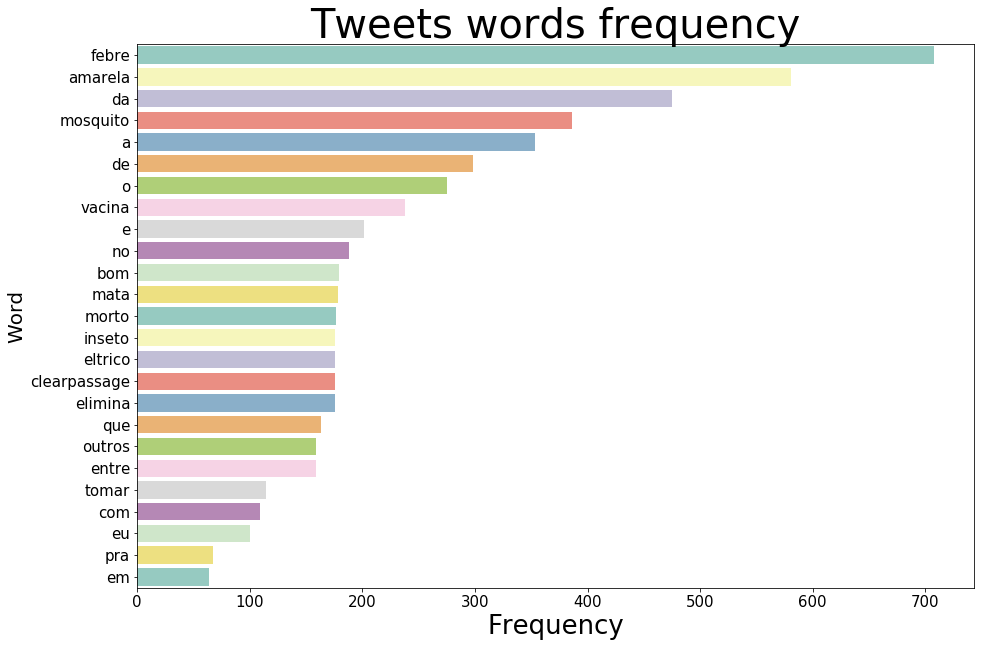

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:25]

ax = sns.barplot(y='Word', x = 'Frequency', data=df2, palette="Set3" )
#sns.despine()
ax.set(xlabel='Tweets words frequency', ylabel='Word')
#ax.set(xticks=range(1, 9), xticklabels=list([10,20,30,40,50,60,70,80,90]))

#ax.set(xticklabels=list(range(0,90,10)))
#plt.figure(figsize=(20,10))

ax.axes.set_title("Tweets words frequency",fontsize=40)
ax.set_xlabel("Frequency",fontsize=26)
ax.set_ylabel("Word",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## achar as cidades

In [46]:
!pip install geopy

notebook 5.3.1 has requirement terminado>=0.8.1, but you'll have terminado 0.6 which is incompatible.


In [62]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
local = [-5.494122, -37.585037]
reverse = geolocator.reverse(local)
reverse



Location(Felipe Guerra, Mulungu, Microrregião da Chapada do Apodi, Mesorregião do Oeste Potiguar, RN, Região Nordeste, Brasil, (-5.4601268, -37.6738437, 0.0))

In [63]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

my_address = '1600 Pennsylvania Avenue NW Washington, DC 20500'

geolocator = Nominatim()
try:
    location = geolocator.geocode(my_address)
    print (location.latitude, location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(my_address, e.msg))



38.8976998 -77.0365534886228


In [14]:
place = []
for result in results:
    if 'place'in result and result['place']:
        place.append(result['place']['country'])
place = set(place)
len(place)
print(place)

#

{'Brazil'}


In [15]:
# Estado

place = []
for result in results:
    if 'estado'in result and result['estado']:
        place.append(result['estado'])
place = set(place)
len(place)
print(place)


{'Amazonas', 'Rocha', 'Bahia', 'Paraiba', 'Ceara', 'Roraima', 'Santa Catarina', 'Rio Grande do Norte', 'Goias', 'Tocantins', 'Pernambuco', 'Rio de Janeiro', 'Mato Grosso', 'Para', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Maranhao', 'Parana', 'Minas Gerais', 'Alagoas', 'Sao Paulo', 'Maule', 'Espirito Santo'}


In [16]:
#CONTAGEM POR CIDADE

s = ''
for tweet in results:
    if 'cidade' in tweet:
        s = s + tweet['cidade'] + "-"
        
s = s.lower()

cidad = s.split("-")

from collections import Counter

cont = Counter(cidad)
#print (c.most_common()[:130])
most_common = cont.most_common()[:130]

for i in most_common:
    print (i[0])

paraiba do sul
embu guacu
itaguai
luziania
caraguatatuba
nilopolis
guaiba
niteroi
sao jose dos campos
guarulhos
araucaria
rio de janeiro
mongagua
guapo
praia grande
paraty
jaboatao
indaiatuba
sao bernardo do campo
ibirite
manacapuru
nova iguacu
pantano do sul
maracanau
sao sebastiao
marechal deodoro
embu
barcarena
itatiaia
itaparica
peruibe
santa isabel
sao lourenco da serra
duque de caxias
rio claro
santo antonio do leverger
parnamirim
parnarama
sao paulo
corupa
quatro barras
ubatuba
valparaiso
guaratuba
imperatriz
pirapozinho
iguaba grande
pelotas
caieiras
cachoeiras de macacu
volta redonda
chapeco
charqueada
rio brilhante
morro da fumaca
recife
cacapava
juquitiba
santa barbara d'oeste
encruzilhada do sul
rondonopolis
constitucion
casimiro de abreu
conde
capao bonito
sao gabriel
pires do rio
farroupilha
itapevi
governador dix sept rosado
artur nogueira
itupeva
borborema
sao fidelis
joao monlevade
paty do alferes
boa vista
cruz alta
macae
presidente venceslau
gurupi
conchas
vicosa
pir

In [17]:
import pandas as pd
df = pd.DataFrame(([cidad, freq] for cidad, freq in most_common), columns=['city', 'Frequency'])
df

,city,Frequency
0,paraiba do sul,187
1,embu guacu,139
2,itaguai,111
3,luziania,14
4,caraguatatuba,14
5,nilopolis,13
6,guaiba,13
7,niteroi,10
8,sao jose dos campos,10
9,guarulhos,8


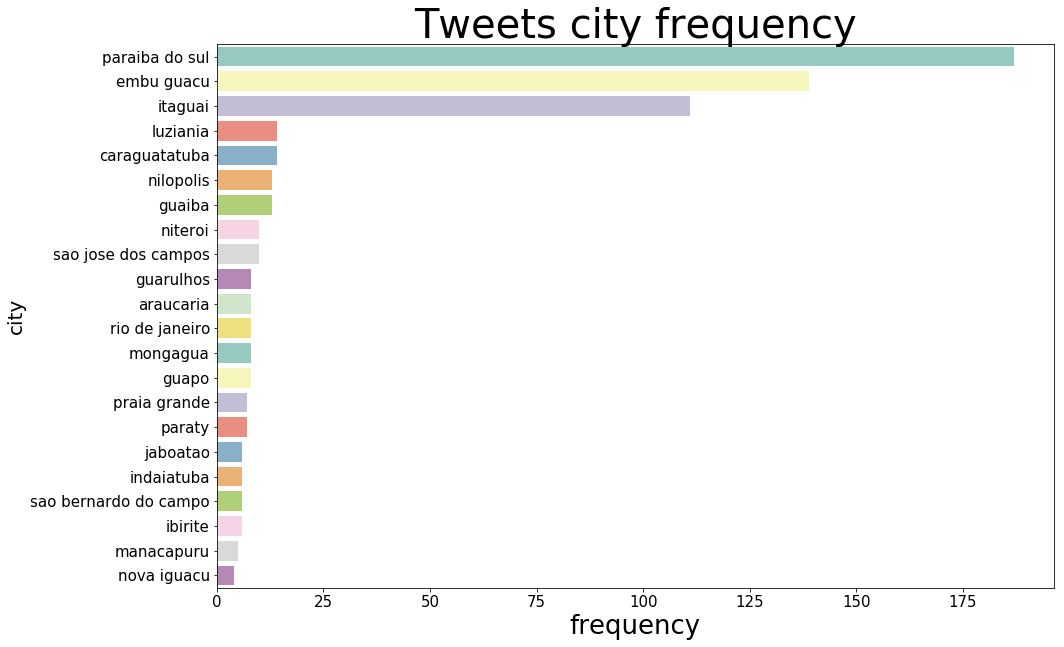

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:22]

ax = sns.barplot(y='city', x = 'Frequency', data=df2, palette="Set3" )
ax.set(xlabel='Tweets city frequency', ylabel='city')
ax.axes.set_title("Tweets city frequency",fontsize=40)
ax.set_xlabel("frequency",fontsize=26)
ax.set_ylabel("city",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

In [20]:
#CONTAGEM POR ESTADO
es = ''
for tweet in results:
    if 'estado' in tweet:
        es = es + tweet['estado'] + "-"
        
es = es.lower()

estad = es.split("-")

from collections import Counter

cont = Counter(estad)
#print (c.most_common()[:130])
most_common = cont.most_common()[:23]

for i in most_common:
    print (i[0]) 

rio de janeiro
sao paulo
rio grande do sul
goias
parana
santa catarina
minas gerais
pernambuco
para
mato grosso
amazonas
rio grande do norte
maranhao
ceara
alagoas
bahia
espirito santo
mato grosso do sul
maule
paraiba
roraima
tocantins
rocha


In [21]:
import pandas as pd
df = pd.DataFrame(([word, freq] for word, freq in most_common), columns=['state', 'Frequency'])
df

,state,Frequency
0,rio de janeiro,363
1,sao paulo,258
2,rio grande do sul,25
3,goias,25
4,parana,15
5,santa catarina,15
6,minas gerais,15
7,pernambuco,12
8,para,7
9,mato grosso,6


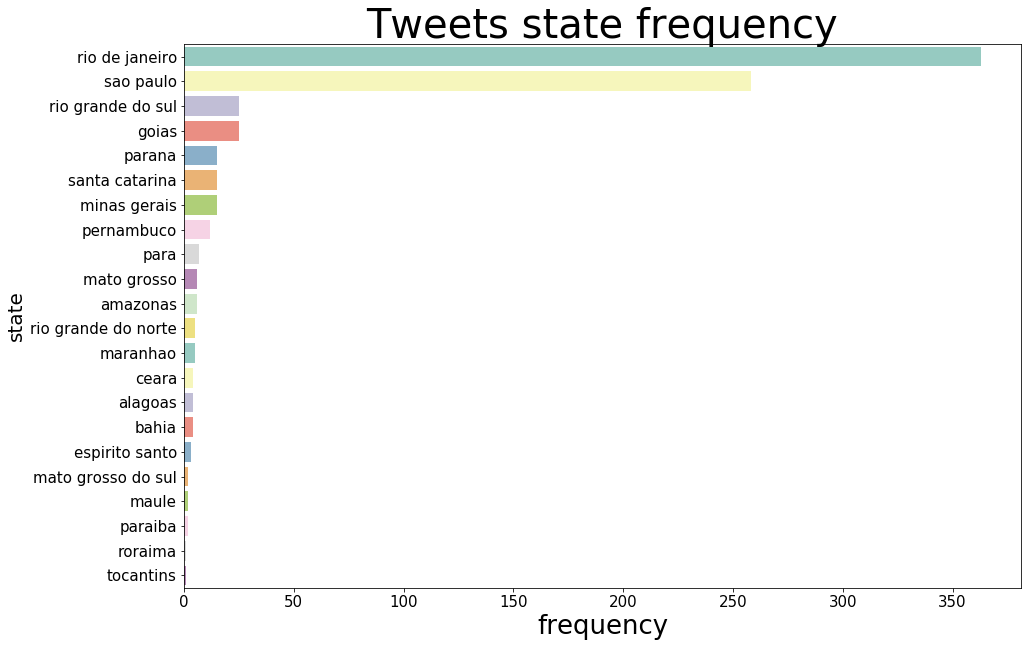

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:22]

ax = sns.barplot(y='state', x = 'Frequency', data=df2, palette="Set3" )
ax.set(xlabel='Tweets state frequency', ylabel='state')
ax.axes.set_title("Tweets state frequency",fontsize=40)
ax.set_xlabel("frequency",fontsize=26)
ax.set_ylabel("state",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

In [136]:
len(results)

781

In [105]:
print(results[0])

{'_id': ObjectId('5b3d39e6e535430c7b8bff25'), 'created_at': 'Tue Mar 13 20:27:36 +0000 2018', 'id': 973656844601315328, 'id_str': '973656844601315328', 'text': 'Hoje que tomei coragem de dar vacina da febre amarela a Mikaelly.', 'geo': None, 'lang': 'pt', 'coordinates': None, 'retweeted': 'false', 'place': {'id': 'b1a5f3bbff698d24', 'url': 'https://api.twitter.com/1.1/geo/id/b1a5f3bbff698d24.json', 'place_type': 'city', 'name': 'Mesquita', 'full_name': 'Mesquita, Brasil', 'country_code': 'BR', 'country': 'Brazil', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-43.496757, -22.840589], [-43.397015, -22.840589], [-43.397015, -22.764566], [-43.496757, -22.764566]]]}, 'attributes': {}}, 'data': datetime.datetime(2018, 3, 13, 20, 27, 36), 'cidade': 'Nilopolis', 'estado': 'Rio de Janeiro'}


In [120]:
place = []
x = 0
for result in results:
    if 'estado'  in result:
        place.append(result['estado'])
        x = x +1
location = set(place)
len(location)

23

In [121]:
x

781

In [107]:
print(location)

{'Sao Paulo', 'Parana', 'Minas Gerais', 'Maule', 'Rocha', 'Pernambuco', 'Santa Catarina', 'Rio Grande do Sul', 'Maranhao', 'Alagoas', 'Amazonas', 'Rio Grande do Norte', 'Roraima', 'Mato Grosso do Sul', 'Bahia', 'Ceara', 'Mato Grosso', 'Rio de Janeiro', 'Para', 'Tocantins', 'Paraiba', 'Goias', 'Espirito Santo'}


## contar a ocorrencia de cidade

In [110]:
from collections import Counter

c = Counter(location)
#print(c)
cidades = c.items()
print(cidades)

dict_items([('Sao Paulo', 1), ('Parana', 1), ('Minas Gerais', 1), ('Maule', 1), ('Rocha', 1), ('Pernambuco', 1), ('Santa Catarina', 1), ('Rio Grande do Sul', 1), ('Maranhao', 1), ('Alagoas', 1), ('Amazonas', 1), ('Rio Grande do Norte', 1), ('Roraima', 1), ('Mato Grosso do Sul', 1), ('Bahia', 1), ('Ceara', 1), ('Mato Grosso', 1), ('Rio de Janeiro', 1), ('Para', 1), ('Tocantins', 1), ('Paraiba', 1), ('Goias', 1), ('Espirito Santo', 1)])


## colocando as cidades, frequencia num dataframe e salvando no excel

In [24]:
import pandas as pd
df = pd.DataFrame(([cidad, freq] for cidad, freq in cidades), columns=['state', 'frequency'])

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('estado.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
df

NameError: name 'cidades' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:22]

ax = sns.barplot(y='state', x = 'frequency', data=df2, palette="Set3" )
ax.set(xlabel='Tweets cities frequency', ylabel='cities')
ax.axes.set_title("Tweets cities frequency",fontsize=40)
ax.set_xlabel("frequency",fontsize=26)
ax.set_ylabel("cities",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## conversao de lat, long para cidade

In [92]:
#!pip install reverse_geocoder


    100% |████████████████████████████████| 2.3MB 415kB/s ta 0:00:01
  Running setup.py bdist_wheel for reverse-geocoder ... done
  Stored in directory: /home/eleonilia/.cache/pip/wheels/92/7b/89/029b346ceab0416cd337ad2994a035b287bf54a0f22a4871c8
Successfully built reverse-geocoder
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import reverse_geocoder as rg

coordinates = (51.5214588,-0.1729636)
results = rg.search(coordinates) # default mode = 2
print (results)

Loading formatted geocoded file...
[OrderedDict([('lat', '51.51116'), ('lon', '-0.18426'), ('name', 'Bayswater'), ('admin1', 'England'), ('admin2', 'Greater London'), ('cc', 'GB')])]


In [2]:
import reverse_geocoder as rg

coordinates = (-5.494122, -37.585037)
results = rg.search(coordinates) # default mode = 2
print (results)

[OrderedDict([('lat', '-5.45889'), ('lon', '-37.52083'), ('name', 'Governador Dix Sept Rosado'), ('admin1', 'Rio Grande do Norte'), ('admin2', 'Governador Dix-Sept Rosado'), ('cc', 'BR')])]


In [28]:
type(results)

list

In [42]:
results[0]['name']

'Pilar do Sul'

In [11]:
import pandas as pd

database = "twitter_febre_amarela_1"
collection = "febre amarela"

#def datasetee (database, collection):
cliente = pymongo.MongoClient()
db = cliente[database]
coll = db[collection]
#a = coll.find_one()
#print(a)
#b = coll.count()
#print(b)

dataset = [ {"data":tweet["data"],"id_str":tweet["id_str"],"lang":tweet["lang"],"retweeted":tweet["retweeted"],
             "state":tweet["estado"],"city":tweet["cidade"],"text":tweet["text"],
       } for tweet in coll.find()]
df = pd.DataFrame(dataset)


#Crie um gravador do Pandas Excel usando o XlsxWriter como o mecanismo.
writer = pd.ExcelWriter('twitter_febre_amarela.xlsx', engine='xlsxwriter')

# Converta o dataframe em um objeto do XlsxWriter Excel.
df.to_excel(writer, sheet_name='Sheet1')

#Fechar o escritor do Pandas Excel e imprimir o arquivo do Excel.
writer.save()

#    return df

#datasetee("classificacao_febre_amarela_Parte1", "febre amarela")